In [26]:
# Importing necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

# Generate some random data for demonstration purposes
npoints = 200
np.random.seed(0)
X = 2 * np.random.rand(npoints, 1)  # Generate 100 random numbers between 0 and 2
y = 3 *np.sin(2*X)* X**3 + 4 + np.random.randn(npoints, 1)  # Arbitrary relationship with noise

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

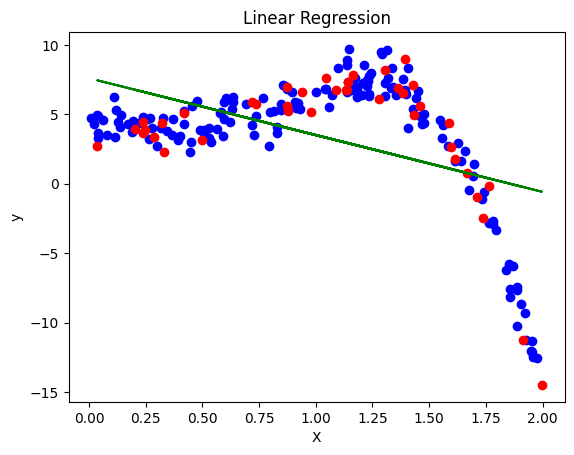

Training Accuracy: 0.22983511814516644
Testing Accuracy: 0.10677104948517269


In [27]:
# Create and fit the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Visualize the training data and the linear regression line
plt.scatter(X_train, y_train, color='blue')
plt.scatter(X_test, y_test, color='red')
plt.plot(X_test, y_pred, color='green')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.show()

# Evaluate the model
print("Training Accuracy:", model.score(X_train, y_train))
print("Testing Accuracy:", model.score(X_test, y_test))

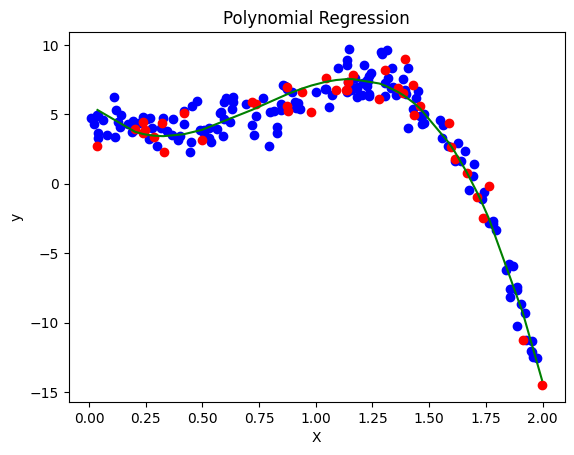

Training Accuracy: 0.9550658187577745
Testing Accuracy: 0.9455586821761622


In [28]:
# Feature engineering: Adding polynomial features
poly_features = PolynomialFeatures(degree=3)  # n-th order features
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Create and fit the Polynomial Regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_poly)

# Visualize the training data and the polynomial regression curve
plt.scatter(X_train, y_train, color='blue')
plt.scatter(X_test, y_test, color='red')
plt.plot(np.sort(X_test, axis=0), y_pred[np.argsort(X_test, axis=0), 0], color='green')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression')
plt.show()

# Evaluate the model
print("Training Accuracy:", model.score(X_train_poly, y_train))
print("Testing Accuracy:", model.score(X_test_poly, y_test))

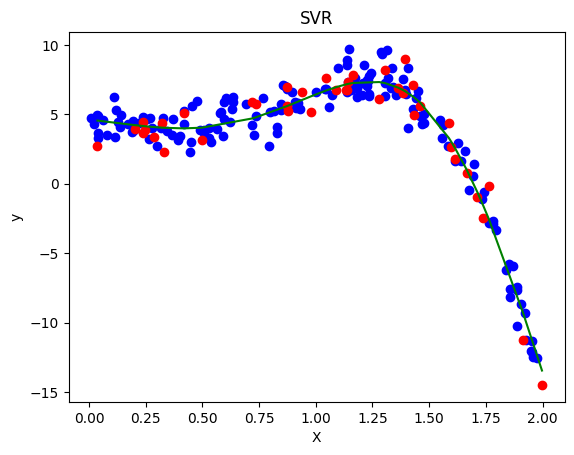

Training Accuracy: 0.9612212736459099
Testing Accuracy: 0.9516607750851915


In [29]:
from sklearn.svm import SVR

# Create and fit the SVR model
model = SVR(kernel='rbf', C=100, gamma='auto')  # RBF kernel is commonly used
model.fit(X_train, y_train.ravel())  # ravel() is used to convert y_train to a 1D array

# Make predictions on the test data
y_pred = model.predict(X_test)

# Visualize the training data and the SVR predictions
plt.scatter(X_train, y_train, color='blue')
plt.scatter(X_test, y_test, color='red')
plt.plot(np.sort(X_test, axis=0), y_pred[np.argsort(X_test, axis=0)], color='green')
plt.xlabel('X')
plt.ylabel('y')
plt.title('SVR')
plt.show()

# Evaluate the model
print("Training Accuracy:", model.score(X_train, y_train))
print("Testing Accuracy:", model.score(X_test, y_test))

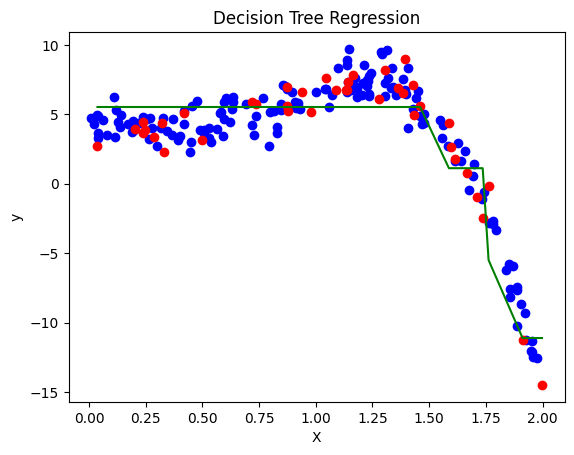

Training Accuracy: 0.8857713326436718
Testing Accuracy: 0.8156901748608731


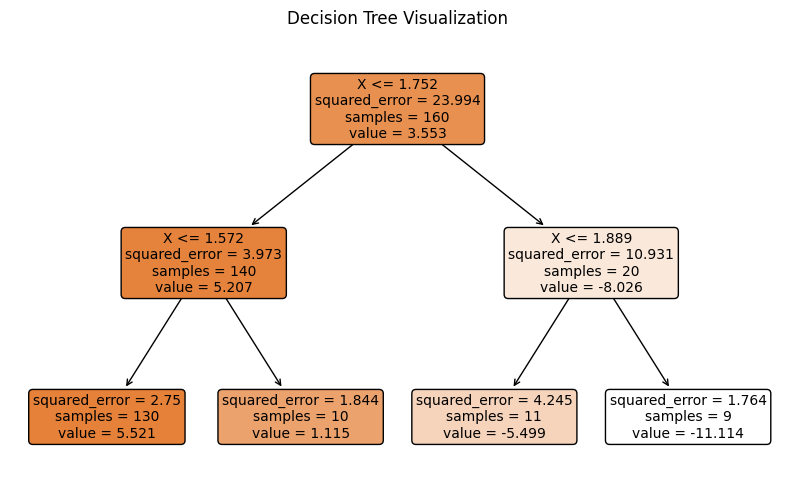

In [30]:
from sklearn.tree import DecisionTreeRegressor

# Create and fit the Decision Tree Regression model
model = DecisionTreeRegressor(max_depth=2)  # Limiting depth to avoid overfitting
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Visualize the training data and the decision tree predictions
plt.scatter(X_train, y_train, color='blue')
plt.scatter(X_test, y_test, color='red')
plt.plot(np.sort(X_test, axis=0), model.predict(np.sort(X_test, axis=0)), color='green')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Decision Tree Regression')
plt.show()

# Evaluate the model
print("Training Accuracy:", model.score(X_train, y_train))
print("Testing Accuracy:", model.score(X_test, y_test))


from sklearn.tree import plot_tree

# Visualize the decision tree
plt.figure(figsize=(10, 6))
plot_tree(model, filled=True, feature_names=['X'], rounded=True, fontsize=10)
plt.title('Decision Tree Visualization')
plt.show()

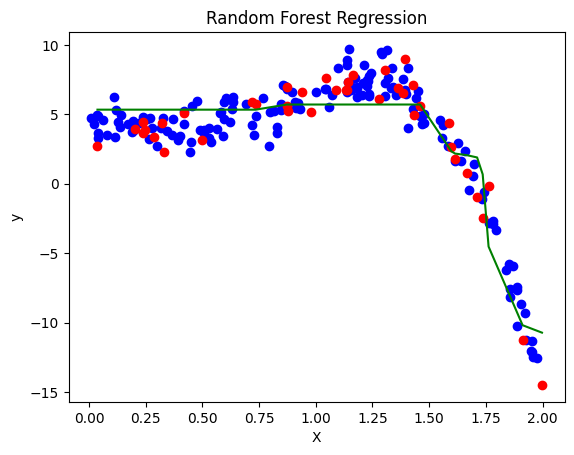

Training Accuracy: 0.9106639086440216
Testing Accuracy: 0.8469544374303903


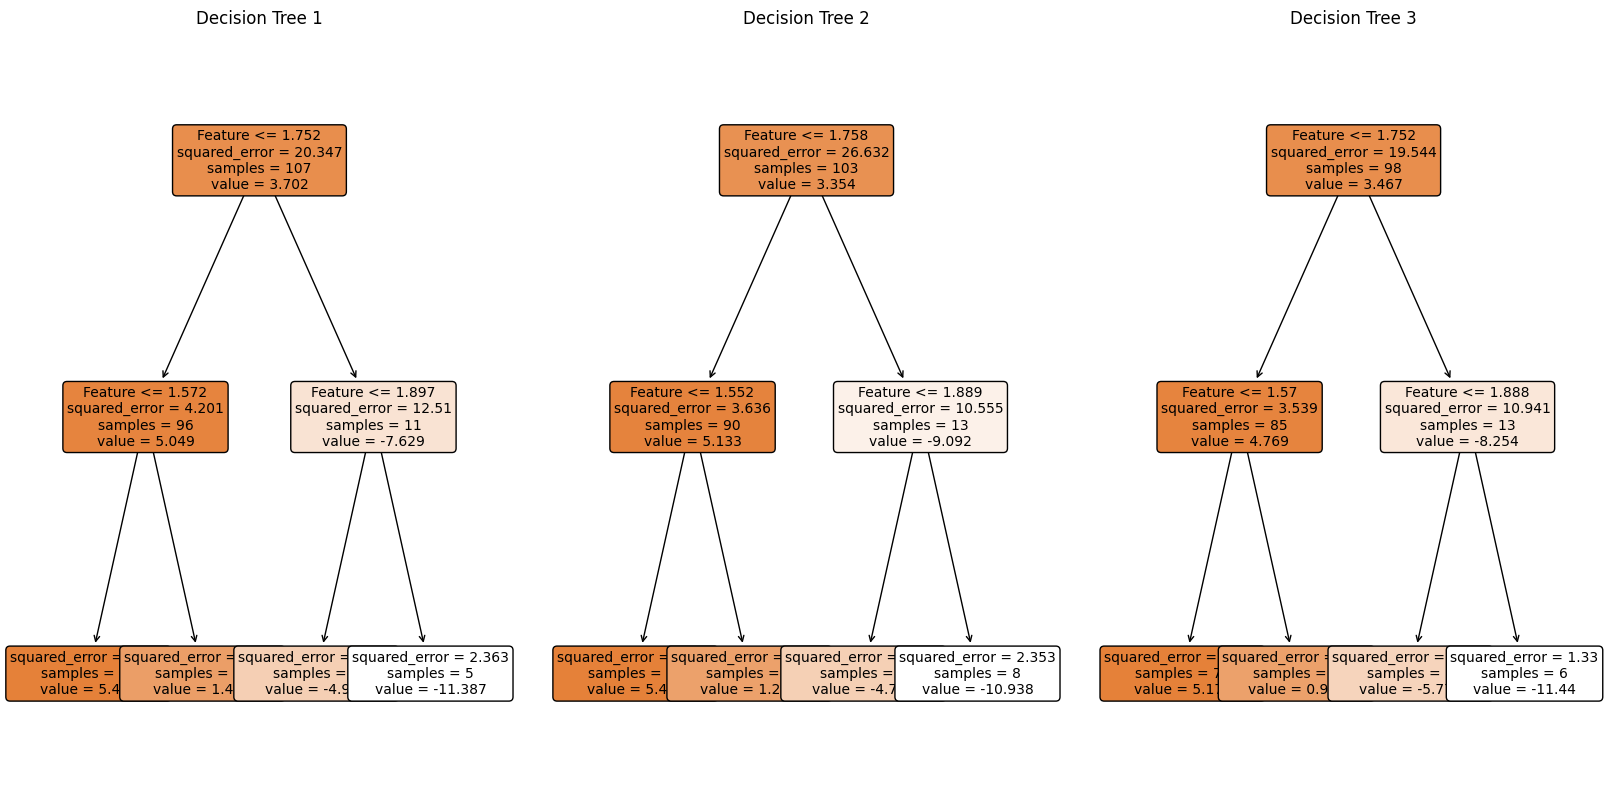

In [31]:
from sklearn.ensemble import RandomForestRegressor

# Create and fit the Random Forest Regression model
model = RandomForestRegressor(n_estimators=100, max_depth=2, random_state=42)
model.fit(X_train, y_train.ravel())  # ravel() is used to convert y_train to a 1D array

# Make predictions on the test data
y_pred = model.predict(X_test)
# Visualize the training data and the Random Forest predictions
plt.scatter(X_train, y_train, color='blue')
plt.scatter(X_test, y_test, color='red')
plt.plot(np.sort(X_test, axis=0), model.predict(np.sort(X_test, axis=0)), color='green')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Random Forest Regression')
plt.show()

# Evaluate the model
print("Training Accuracy:", model.score(X_train, y_train))
print("Testing Accuracy:", model.score(X_test, y_test))


# Visualize the structure of each decision tree in the Random Forest
plt.figure(figsize=(20, 10))
for i in range(3):  # Plotting first 3 decision trees for demonstration
    plt.subplot(1, 3, i + 1)
    plot_tree(model.estimators_[i], filled=True, feature_names=['Feature'], rounded=True, fontsize=10)
    plt.title(f'Decision Tree {i+1}')
plt.show()

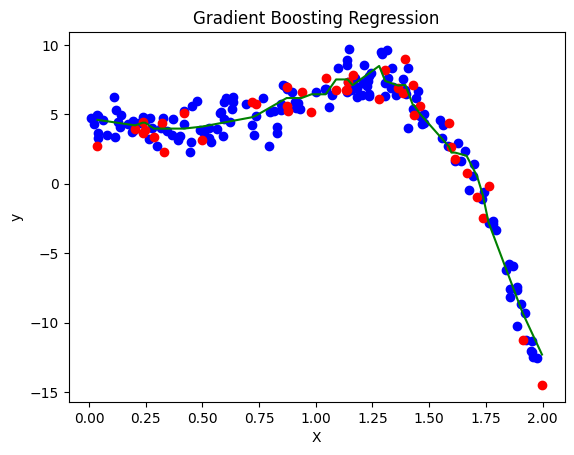

Training Accuracy: 0.980907621665216
Testing Accuracy: 0.9318344789872127


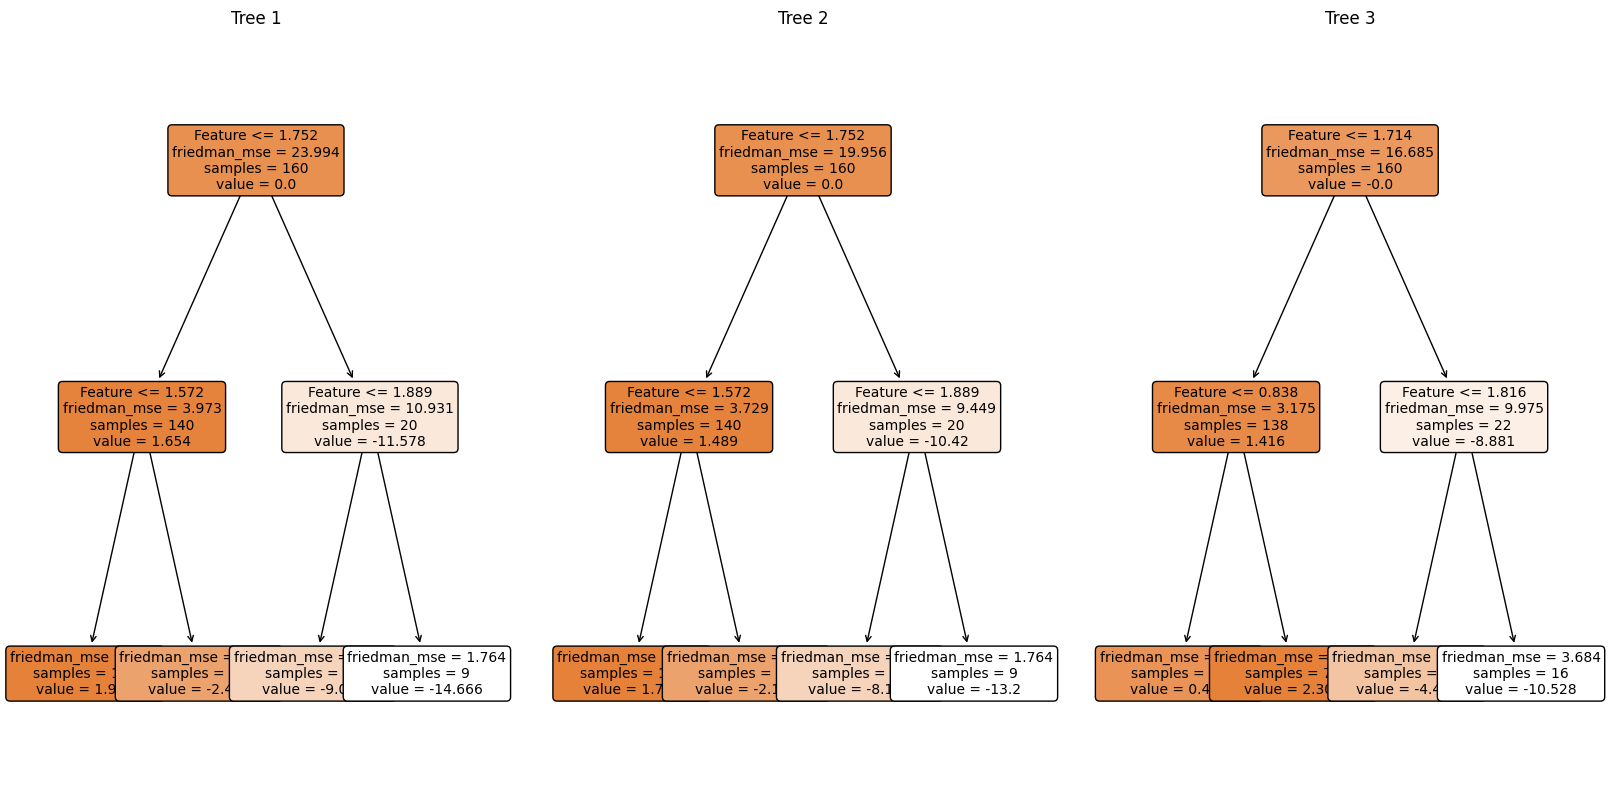

Rememebr that if the training MSE is much lower than the testing MSE, it suggests overfitting
Training MSE: 0.45809810856322863
Testing MSE: 1.4412777724823322


In [32]:
from sklearn.ensemble import GradientBoostingRegressor

# Create and fit the Gradient Boosting Regression model
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=2, random_state=42)
model.fit(X_train, y_train.ravel())  # ravel() is used to convert y_train to a 1D array

# Make predictions on the test data
y_pred = model.predict(X_test)

# Visualize the training data and the Gradient Boosting predictions
plt.scatter(X_train, y_train, color='blue')
plt.scatter(X_test, y_test, color='red')
plt.plot(np.sort(X_test, axis=0), model.predict(np.sort(X_test, axis=0)), color='green')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Gradient Boosting Regression')
plt.show()

# Evaluate the model
print("Training Accuracy:", model.score(X_train, y_train))
print("Testing Accuracy:", model.score(X_test, y_test))

# Visualize individual trees within the Gradient Boosting ensemble
plt.figure(figsize=(20, 10))
for i in range(3):  # Plotting first 3 decision trees for demonstration
    plt.subplot(1, 3, i + 1)
    plot_tree(model.estimators_[i, 0], filled=True, feature_names=['Feature'], rounded=True, fontsize=10)
    plt.title(f'Tree {i+1}')
plt.show()

from sklearn.metrics import mean_squared_error

# Evaluate training and testing performance
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Rememebr that if the training MSE is much lower than the testing MSE, it suggests overfitting")
print("Training MSE:", train_mse)
print("Testing MSE:", test_mse)

/home/pica3601/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


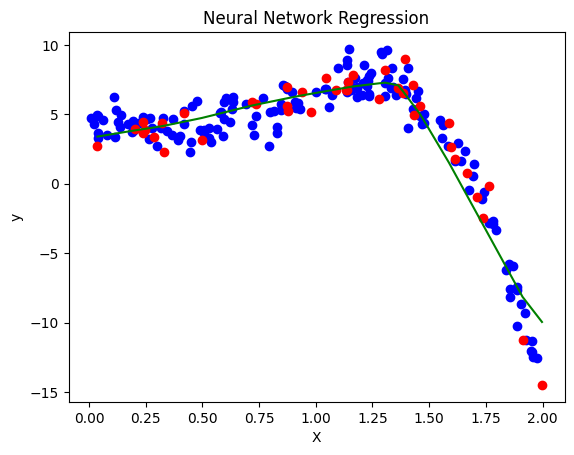

Training Loss: 1.6461105346679688
Testing Loss: 2.312528371810913


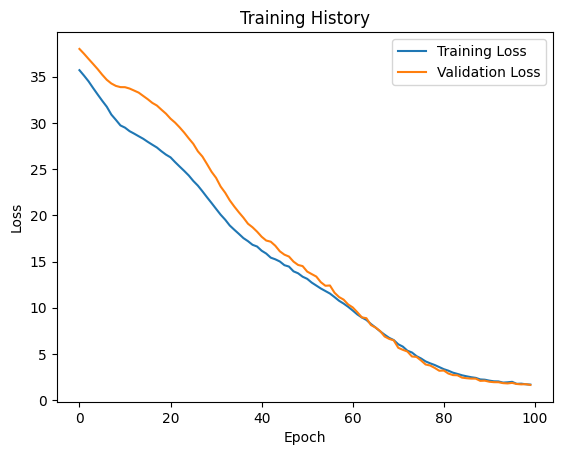

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Remember that if the training MSE is much lower than the testing MSE, it suggests overfitting
Training MSE: 1.6461105466397221
Testing MSE: 2.0587666441465404


In [33]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

# Define the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the neural network model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose = 0)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Visualize the training data and the neural network predictions
plt.scatter(X_train, y_train, color='blue')
plt.scatter(X_test, y_test, color='red')
plt.plot(np.sort(X_test, axis=0), model.predict(np.sort(X_test, axis=0)), color='green')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Neural Network Regression')
plt.show()

# Evaluate the model
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print("Training Loss:", train_loss)
print("Testing Loss:", test_loss)

# Visualize the training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training History')
plt.legend()
plt.show()

# Evaluate training and testing performance
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Remember that if the training MSE is much lower than the testing MSE, it suggests overfitting")
print("Training MSE:", train_mse)
print("Testing MSE:", test_mse)

/home/pica3601/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


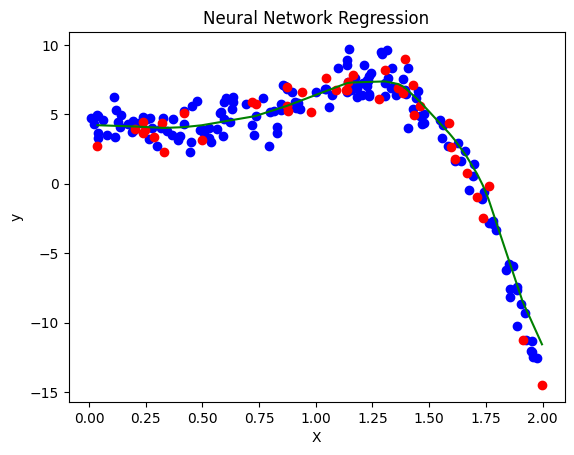

Training Loss: 1.087785005569458
Testing Loss: 1.2126672267913818


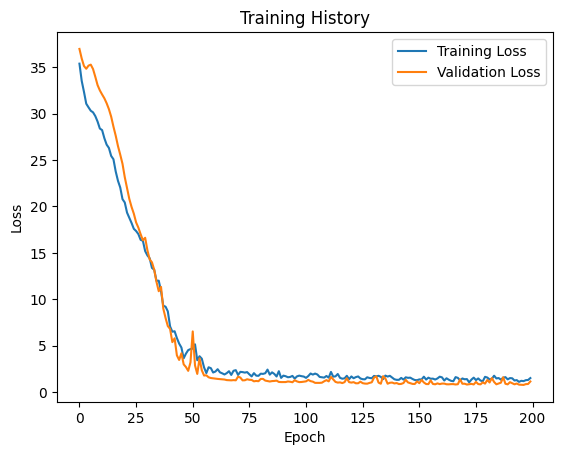

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Remember that if the training MSE is much lower than the testing MSE, it suggests overfitting
Training MSE: 1.0877849175158052
Testing MSE: 1.3700039066517504


In [34]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

# Define the neural network model with optimized structure
model = Sequential([
    Dense(128, activation='relu', input_shape=(1,)),
    Dense(256, activation='relu'),
    Dropout(0.2),  # Adding dropout for regularization
    Dense(128, activation='relu'),
    Dense(1)
])

# Compile the model with a lower learning rate for better convergence
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mean_squared_error')

# Fit the neural network model
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.2, verbose=0)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Visualize the training data and the neural network predictions
plt.scatter(X_train, y_train, color='blue')
plt.scatter(X_test, y_test, color='red')
plt.plot(np.sort(X_test, axis=0), model.predict(np.sort(X_test, axis=0)), color='green')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Neural Network Regression')
plt.show()

# Evaluate the model
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print("Training Loss:", train_loss)
print("Testing Loss:", test_loss)

# Visualize the training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training History')
plt.legend()
plt.show()

# Evaluate training and testing performance
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Remember that if the training MSE is much lower than the testing MSE, it suggests overfitting")
print("Training MSE:", train_mse)
print("Testing MSE:", test_mse)
